In [1]:
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_files(path):
    #function to read the corpus into a list of strings
    with open(path, 'rb') as file:
        data = file.read().decode('utf8', 'surrogateescape')
        data = data.splitlines()
    return data

In [3]:
#load the RateMD corpus in memory
text_list = read_files('ratemd.25k.all.txt')
print(len(text_list))

25000


In [4]:
#we have 25k rows of text
#one doctor can be associated to multiple reviews
#want to turn text_list into a list of tuples called dr_list
#the first element in the tuple contains all doctor metadata
#the second element in the tuple contains the review (numeric and text)
#there are many other potential approaches to this problem
#the advantage of this approach is that the list of tuples that we obtain has always the same structure
#any tuple in dr_list has two elements, which are two lists
#the first has length 4 and has the following info (in this order): Dr’s Name; Gender; Location; Specialization
#the second has length 2 and has the following info (in this order): Overall rating; Review text
#we can loop through dr_list and use indices to access the information we are interested in
#for example dr_list[10][0][1] is the gender of the doctor associated to the 11th review
#and dr_list[10][1][0] is the numeric rating from the 11th review
dr_list = []
for x in text_list:
    temp = x.split('\t')
    temp = [one_str.strip() for one_str in temp]
    if len(temp) == 4:
        key = temp
    if len(temp) == 2:
        value = temp
        dr_list.append((key, value))

### Problem 1: sentiment analysis of reviews by gender

In [5]:
#create a dictionary with two keys, Female and Male
#the values associated to these keys will be lists with all
#ratings given to female and male doctors respectively
review_dict = {'Female' : [], 'Male' : []}
for x in dr_list:
    key = x[0][1]
    value = float(x[1][0].replace('Overall rating: ', ''))
    review_dict[key] = review_dict[key] + [value]
    
#total count of reviews by gender and overall
count_m_review = len(review_dict['Male'])
count_f_review = len(review_dict['Female'])
count_review = count_m_review + count_f_review

#count positive reviews for male doctors
positive_m_review = 0
for x in review_dict['Male']:
    if x > 3:
        positive_m_review += 1 

#count positive reviews for female doctors
positive_f_review = 0
for x in review_dict['Female']:
    if x > 3:
        positive_f_review += 1
        
#count overall positive reviews
positive_review = positive_f_review + positive_m_review

#turn counts into percentages
perc_positive_m = positive_m_review / count_m_review
perc_positive_f = positive_f_review / count_f_review
perc_positive = positive_review / count_review

print('Total reviews: {}'.format(count_review))
print('')

print('Total reviews - Male: {}'.format(count_m_review))
print('Total reviews - Female: {}'.format(count_f_review))
print('Percentage reviews - Male: {}%'.format(round(count_m_review/count_review*100, 1)))
print('Percentage reviews - Female: {}%'.format(round(count_f_review/count_review*100, 1)))
print('')

print('Total positive reviews - Male: {}'.format(positive_m_review))
print('Total positive reviews - Female: {}'.format(positive_f_review))
print('Total positive reviews: {}'.format(positive_review))
print('Percentage positive reviews - Male: {}%'.format(round(positive_m_review/count_m_review*100, 1)))
print('Percentage positive reviews - Female: {}%'.format(round(positive_f_review/count_f_review*100, 1)))
print('Percentage positive reviews: {}%'.format(round(positive_review/count_review*100, 1)))

Total reviews: 20421

Total reviews - Male: 15615
Total reviews - Female: 4806
Percentage reviews - Male: 76.5%
Percentage reviews - Female: 23.5%

Total positive reviews - Male: 10616
Total positive reviews - Female: 2953
Total positive reviews: 13569
Percentage positive reviews - Male: 68.0%
Percentage positive reviews - Female: 61.4%
Percentage positive reviews: 66.4%


### Problem 1: analysis of review length

Longest review: 1028 words
Shortest review: 0 words
Mean review: 70.8 words
Median review: 51.0 words


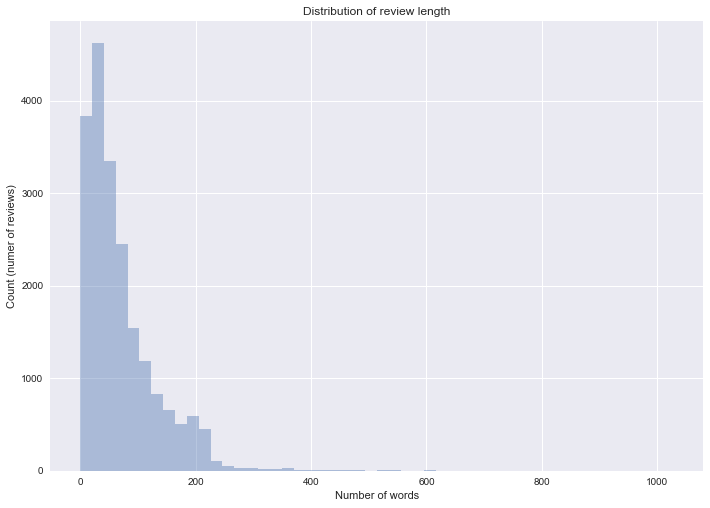

In [6]:
#create a list with all review lenghts
#review length is defined as the number of words in a review
review_len = []
for x in dr_list:
    review = x[1][1]
    num_words = len(word_tokenize(review))
    review_len.append(num_words)

#make a histogram of the distribution of the review length
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(review_len, kde = False)
sns.despine()
plt.ylabel('Count (numer of reviews)')
plt.xlabel('Number of words')
plt.title('Distribution of review length')
plt.savefig('histogram.png')

print('Longest review: {} words'.format(max(review_len)))
print('Shortest review: {} words'.format(min(review_len)))
print('Mean review: {} words'.format(round(np.mean(review_len), 1)))
print('Median review: {} words'.format(np.median(review_len)))

In [7]:
#count of distinct doctors in the corpus
doctors = []
for x in dr_list:
    doctors.append(x[0][0].strip())
doctors = list(set(doctors))
print('Number of distinct doctors: {}'.format(len(doctors)))

Number of distinct doctors: 4223
